<a href="https://colab.research.google.com/github/rababta/Computer-Vision-Project/blob/Final_outcome/ComputerVisionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Object Detection Using YOLO <b> </h1></center>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This tutorial is designed to provide a comprehensive understanding of how to use YOLO, a state-of-the-art method in computer vision, for detecting objects in images.

Object detection and classification is a key technology in many areas, such as automated vehicles, security, and even healthcare.

We will begin with the basics of preparing (pre processing) an image dataset, ensuring it is ready for effective model training.We will then explore how YOLO, a type of convolutional neural network, automatically extracts features from images to recognize different objects. Understanding this process is crucial for grasping how YOLO operates.

The core of this tutorial is focused on transfer learning using YOLO. We will teach you how to take a pre-trained YOLO model and adapt it to a new dataset. This technique is efficient and powerful, allowing us to harness the strengths of YOLO with less computational effort.

By the end of this tutorial, you will have hands-on experience with preparing data, implementing YOLO, and understanding the principles behind it. This tutorial aims to equip students with practical skills and knowledge in one of the most exciting fields in technology.

Since its inception, the YOLO family of object detection models has come a long way. YOLOv8 is the most recent addition to this famous anchor-based single-shot family of object detectors. It comes with a bunch of improvements which include state-of-the-art accuracy and speed.  In this article, we will be fine tuning the YOLOv8 object detection model on a real-world pothole detection dataset.

In the previous lecture, you were asked to make your own custom datasets for a project you want to work on. Today we will explore how to finetune YOLO on a certain dataset.  

Importing required Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

Installing directories for RAGs

In [3]:
!pip install transformers sentence-transformers -q

Installing libraries

In [4]:
from transformers import pipeline
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

##Dataset for RAGs


In [5]:
# Define a small dataset (corpus) of knowledge
documents = [
   " Colour - Red goes well with Green" ,
 "Colour -  Red goes well with Orange" ,
 "Colour -  Red goes well with Pink" ,
"Colour -  Green goes well with Blue" ,
"Colour -  Yellow goes well with Purple" ,
"Colour -  Yellow goes well with Orange" ,
"Colour -  Blue goes well with Orange" ,
   "Colour - Blue goes well with Purple" ,
"Colour -  Do not wear Red with Yellow" ,
"Colour -  Do not wear Red with Purple" ,
"Colour -  Red does not go well with Yellow" ,
"Colour -  Wear Green and Red together" ,
"Colour -  Wear Green and Blue together" ,
"Colour - Do not Wear Green and Brown together" ,
"Colour -  Wear Yellow and Orange together",
"Colour - Black compliments every colour",
   "Colour - Black and White go well together",
   "Colour - Pair black with bright clothes",
   "Colour -Pair White with light clothes",
"Accessory - A hat would look good with a dress",
   "Accessory - Jackets work well with pants",
   "Accessory - Try a bracelet with a skirt",
   "Accessory - Wear a Necklace with a dress",
   "Accessory - Leggings work well with dresses",
   "Accessory - Wear a watch with Jackets and pants",
   "Accessory - Do not wear a watch with a bracelet",
   "Accessory - Jackets and Hats do not go well together",
   "Accessory - Do not wear socks with pencil heels",
   "Accessory - You can wear socks underneath boots",
   "Accessory - Leggings would work well with boots",
   "Accessory - Try glasses with a dress",
   "Accessory - glasses go well with hats",
   "Accessory -  glasses are good for a sunny day",
   "Shoes - Pencil heels work well with dresses",
   "Shoes -  Flats work well with pants",
   "Shoes - Sport shoes work well with pants",
   "Shoes - all heels work well with skirts",
   "Shoes - Boots work well depending on weather",
   "Shoes - Sport shoes are good for casual wear",

]


#Building Index

In [6]:
# Step 2: Create dense embeddings for the documents
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')  # A lightweight model for embedding
embeddings = embedding_model.encode(documents)  # Generate embeddings

# Step 3: Create a pandas DataFrame for indexing
# Combine documents and embeddings in a DataFrame
df = pd.DataFrame({
    "Document": documents,
    "Embedding": list(embeddings)  # Store embeddings as lists for easier handling
})

# Display the DataFrame
print("Indexed Documents:")
print(df.head())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Indexed Documents:
                                 Document  \
0       Colour - Red goes well with Green   
1     Colour -  Red goes well with Orange   
2       Colour -  Red goes well with Pink   
3     Colour -  Green goes well with Blue   
4  Colour -  Yellow goes well with Purple   

                                           Embedding  
0  [0.022779174, -0.0002953091, -0.010393555, -0....  
1  [0.023941562, -0.020441948, -0.036830768, 0.02...  
2  [0.028353263, -0.032471057, -0.03216509, 0.003...  
3  [-0.0019939085, 0.020738363, 0.030827567, -0.0...  
4  [-0.018068787, -0.028122267, 0.017870132, -0.0...  


In [7]:
def retrieve_with_pandas(query, top_k=2):
    # Generate embedding for the query
    query_embedding = embedding_model.encode([query])[0]

    # Compute similarity scores (cosine similarity)
    df['Similarity'] = df['Embedding'].apply(lambda x: np.dot(query_embedding, x) /
                                             (np.linalg.norm(query_embedding) * np.linalg.norm(x)))
    # Sort by similarity and return top-k results
    results = df.sort_values(by="Similarity", ascending=False).head(top_k)
    return results[["Document", "Similarity"]]



# Define a function to use RAG
def generate_with_rag(query):
    # Retrieve context
    context = retrieve_with_pandas(query)["Document"]
    # Combine context with query
    input_text = f"Respond the query based on the context. Context: {context} Query: {query}"
    # Use LLM to generate a response
    response = llm(input_text, max_length=150, num_return_sequences=1)
    return response[0]['generated_text']


##Query based on Live questions

In [8]:
query = "should i wear boots"
results = retrieve_with_pandas(query, top_k=5)

print("\nQuery:", query)
print("\nSuggestions:")
print(results)


Query: should i wear boots

Suggestions:
                                           Document  Similarity
37     Shoes - Boots work well depending on weather    0.605704
29  Accessory - Leggings would work well with boots    0.581625
28  Accessory - You can wear socks underneath boots    0.501073
38     Shoes - Sport shoes are good for casual wear    0.472576
35         Shoes - Sport shoes work well with pants    0.426585


## Heirarchy of Folders correction



The train and test folders have all the images and labels together.

But for YOLO, the directories should be in:

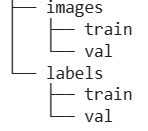


# Custom object detection using YOLO

First install and import

In [9]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/107.7 GB disk)


In [10]:
from ultralytics import YOLO

## Training YOLO

We are going to select small pretrained (on COCO dataset) model of YOLOv8

In [11]:
model = YOLO('yolov8s.pt') # pretrained model

100%|██████████| 21.5M/21.5M [00:00<00:00, 54.0MB/s]


The detailed architecture of the model can be seen from:


In [12]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [13]:
%%writefile config.yaml
path: /content/drive/MyDrive/360 FINAL PROJECT Colours/Colors
train: /content/drive/MyDrive/360 FINAL PROJECT Colours/Colors/images/train
#test: (test dataset folder path)
val: /content/drive/MyDrive/360 FINAL PROJECT Colours/Colors/images/val

# Classes
nc: 6 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: Green
  1: Blue
  2: Red
  3: Yellow
  4: Black
  5: White

Writing config.yaml


Please look at [Yolo train Docs](https://docs.ultralytics.com/modes/train/#train-settings) for hyperparameters for model tuning and configuration, e.g. lr0, imgsz, model etc.

In [14]:
model.train(data="config.yaml",epochs=5,patience=5,batch=8, lr0=0.0001,imgsz=640)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=5, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None

100%|██████████| 755k/755k [00:00<00:00, 6.37MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /content/drive/MyDrive/360 FINAL PROJECT Colours/Colors/labels/train... 358 images, 6 backgrounds, 0 corrupt: 100%|██████████| 364/364 [01:56<00:00,  3.13it/s]


train: New cache created: /content/drive/MyDrive/360 FINAL PROJECT Colours/Colors/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/360 FINAL PROJECT Colours/Colors/labels/val... 93 images, 2 backgrounds, 0 corrupt: 100%|██████████| 95/95 [00:59<00:00,  1.59it/s]

val: New cache created: /content/drive/MyDrive/360 FINAL PROJECT Colours/Colors/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.328      3.888      1.718         15        640: 100%|██████████| 46/46 [14:32<00:00, 18.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:08<00:00, 11.47s/it]

                   all         95        110      0.371      0.526      0.424      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G        1.2      2.014       1.52         11        640: 100%|██████████| 46/46 [14:38<00:00, 19.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:59<00:00,  9.93s/it]

                   all         95        110      0.564      0.556      0.565        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.114      1.555       1.45         11        640: 100%|██████████| 46/46 [14:24<00:00, 18.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:55<00:00,  9.31s/it]

                   all         95        110      0.591        0.7      0.709      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.096      1.361      1.415         16        640: 100%|██████████| 46/46 [14:22<00:00, 18.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:56<00:00,  9.49s/it]

                   all         95        110        0.7      0.748      0.781      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.029      1.149      1.342         10        640: 100%|██████████| 46/46 [14:19<00:00, 18.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:54<00:00,  9.04s/it]

                   all         95        110      0.733      0.763       0.82      0.551



5 epochs completed in 1.293 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:53<00:00,  8.96s/it]


                   all         95        110      0.731      0.764       0.82      0.552
                 Green         23         25      0.645       0.88      0.741        0.5
                  Blue         24         32      0.608      0.812       0.75      0.536
                   Red         16         16      0.606      0.938      0.891       0.61
                Yellow         18         18      0.832      0.722      0.913      0.561
                 Black         12         12          1      0.659      0.846      0.603
                 White          7          7      0.694      0.571      0.781        0.5
Speed: 1.7ms preprocess, 526.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c981ca0d0c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

## Evaluation Metrics

[This](https://docs.ultralytics.com/guides/yolo-performance-metrics/) is a very good detailed explanation of different perfromance metrics in YOLO.

**Choosing the Right Metrics**

Choosing the right metrics to evaluate often depends on the specific application.

- mAP: Suitable for a broad assessment of model performance.

- IoU: Essential when precise object location is crucial.

- Precision: Important when minimizing false detections is a priority.

- Recall: Vital when it's important to detect every instance of an object.

- F1 Score: Useful when a balance between precision and recall is needed.


In [15]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/360 FINAL PROJECT Colours/Colors/labels/val.cache... 93 images, 2 backgrounds, 0 corrupt: 100%|██████████| 95/95 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:53<00:00,  4.49s/it]


                   all         95        110      0.728      0.773       0.82      0.554
                 Green         23         25       0.65       0.88      0.739      0.492
                  Blue         24         32      0.601      0.812      0.754      0.534
                   Red         16         16      0.614      0.938      0.905      0.634
                Yellow         18         18      0.823      0.774      0.888      0.547
                 Black         12         12          1      0.663      0.855       0.62
                 White          7          7      0.679      0.571      0.781        0.5
Speed: 1.7ms preprocess, 528.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train2


0.7730286011259625

Showing confusion matrix, that is already stored in detect/train folder

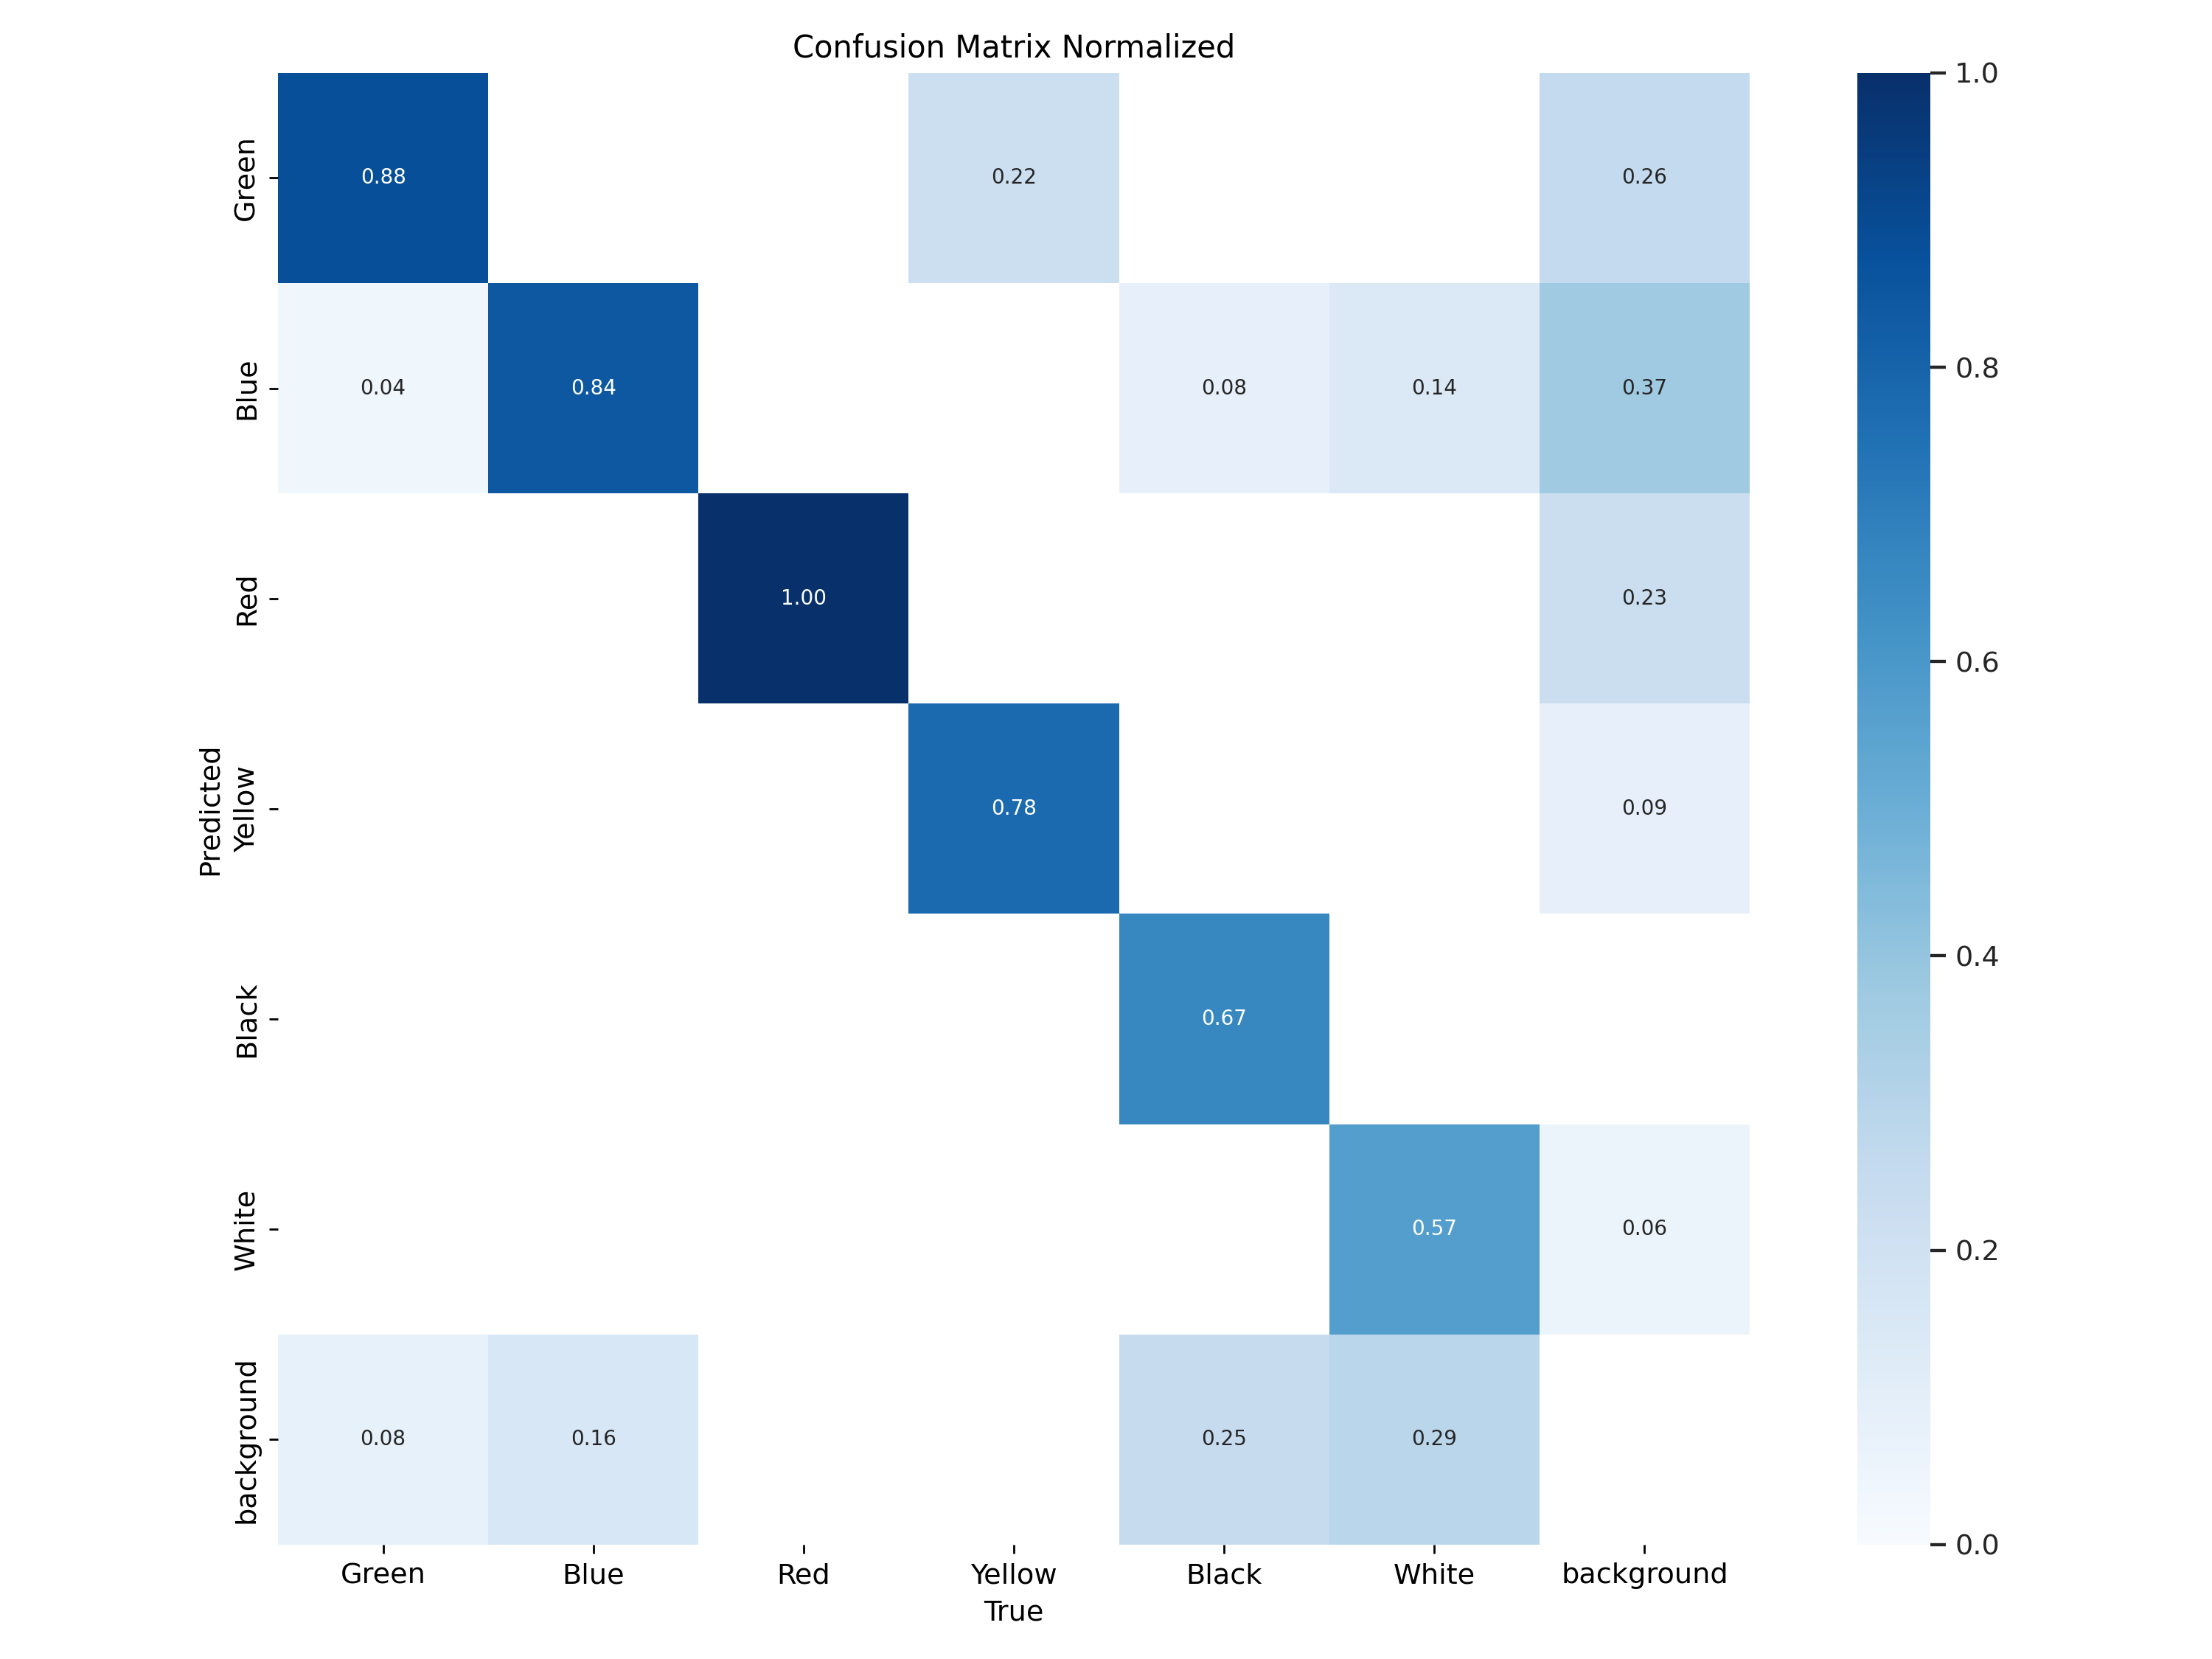

In [16]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train2/confusion_matrix_normalized.png')

##Get A Suggestion from RAGs based on the Image you provide

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.

Found https://i.pinimg.com/736x/c8/e0/bf/c8e0bfd3a0ff8e3ae5e21088dfd144dc.jpg locally at c8e0bfd3a0ff8e3ae5e21088dfd144dc.jpg
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Vide

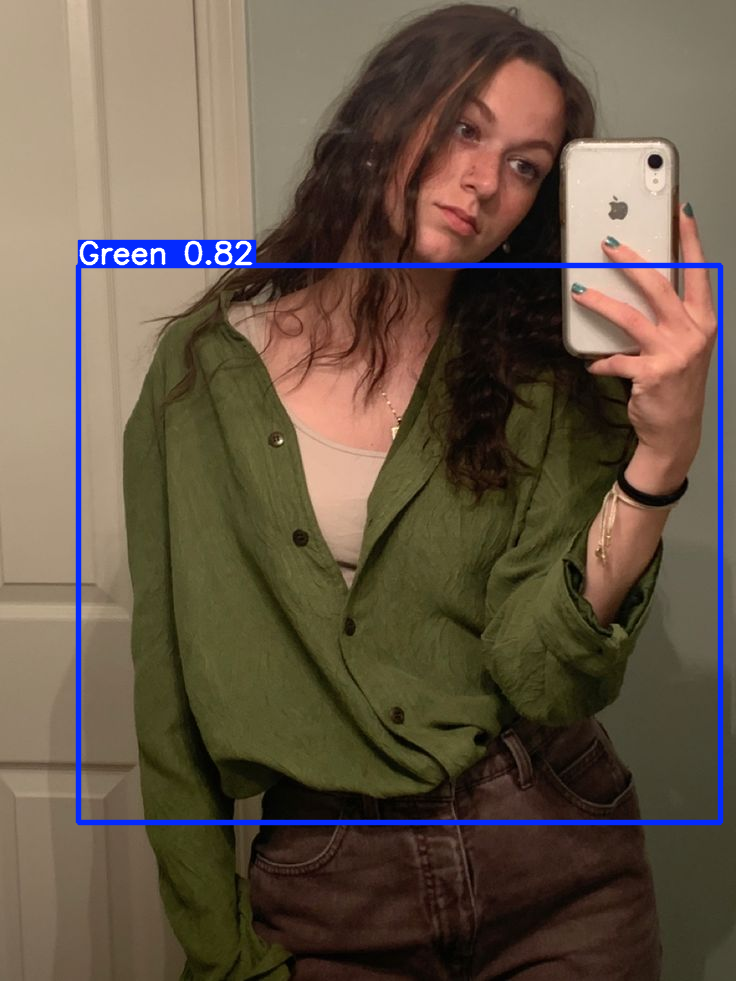

tensor(0.)
Green
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.

Suggestions:
                                         Document  Similarity
0               Colour - Red goes well with Green    0.769699
3             Colour -  Green goes well with Blue    0.745628
11          Colour -  Wear Green and Red together    0.596888
13  Colour - Do not Wear Green and Brown together    0.584304
12         Colour -  Wear Green and Blue together    0.579156
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check 

In [27]:

model = YOLO('/content/runs/detect/train/weights/best.pt')  # load a custom model

# Predict with the model with any image from internet?
results = model('https://i.pinimg.com/736x/c8/e0/bf/c8e0bfd3a0ff8e3ae5e21088dfd144dc.jpg', save=True)

for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen



for x in boxes.cls:
    print(x)
    if x == (0.):
      print("Green")
      query = "What goes well with green"
      results = retrieve_with_pandas(query, top_k=5)
      print("\nSuggestions:")
      print(results)
    elif x == (1.):
      print("Blue")
      query = "What goes well with blue"
      results = retrieve_with_pandas(query, top_k=3)
      print("\nSuggestions:")
      print(results)
    elif x == (2.):
      print("Red")
      query = "What goes well with red"
      results = retrieve_with_pandas(query, top_k=3)
      print("\nSuggestions:")
      print(results)
    elif x == (3.):
      print("Yellow")
      query = "What goes well with yellow"
      results = retrieve_with_pandas(query, top_k=3)
      print("\nSuggestions:")
      print(results)
    elif x == (4.):
      print("Black")
      query = "What goes well with black"
      results = retrieve_with_pandas(query, top_k=3)
      print("\nSuggestions:")
      print(results)
    elif x == (5.):
      print("White")
      query = "What goes well with white"
      results = retrieve_with_pandas(query, top_k=3)
      print("\nSuggestions:")
      print(results)